<a href="https://colab.research.google.com/github/hnhyhj/Python-and-CCC/blob/master/15_More_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 15**
# **More Functions**

A programming language is more than just a means for instructing a computer to perform tasks. The language also serves as a framework within which we organize our ideas about computational processes. Programs serve to communicate those ideas among the members of a programming community. Thus, programs must be written for people to read, and only incidentally for machines to execute.

When we describe a language, we should pay particular attention to the means that the language provides for combining simple ideas to form more complex ideas. Every powerful language has three such mechanisms:

- primitive expressions and statements, which represent the simplest building blocks that the language provides,
- means of combination, by which compound elements are built from simpler ones, and
- means of abstraction, by which compound elements can be named and manipulated as units.

In programming, we deal with two kinds of elements: functions and data. (Soon we will discover that they are really not so distinct.) Informally, data is stuff that we want to manipulate, and functions describe the rules for manipulating the data. Thus, any powerful programming language should be able to describe primitive data and primitive functions, as well as have some methods for combining and abstracting both functions and data.

## 15.1 Definition and call of functions



### 15.1.1 Coding function

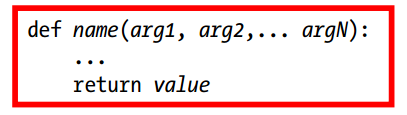

As with all compound Python statements, def consists of a header line followed by a
block of statements, usually indented (or a simple statement after the colon). The
statement block becomes the function’s body—that is, the code Python executes each
time the function is later called.

The def header line specifies a function name that is assigned the function object, along
with a list of zero or more arguments (sometimes called parameters) in parentheses.
The argument names in the header are assigned to the objects passed in parentheses at
the point of call.

The Python return statement can show up anywhere in a function body; when reached,
it ends the function call and sends a result back to the caller. The return statement
consists of an optional object value expression that gives the function’s result. If the
value is omitted, return sends back a None.

The return statement itself is optional too; if it’s not present, the function exits when
the control flow falls off the end of the function body. Technically, a function without
a return statement also returns the None object automatically, but this return value is
usually ignored at the call.

### 15.1. 2 Quiz
1. What is the point of coding functions?
2. At what time does Python create a function?
3. What does a function return if it has no return statement in it?
4. When does the code nested inside the function definition statement run?
5. What’s wrong with checking the types of objects passed into a function?

## 15.2 Scopes

### 15.2.1 Namespace
When you use a name in a program, Python creates, changes, or looks up the name in what is known as a namespace -- a place where names live. When we talk about the search for a name’s value in relation to code, the term scope refers to a namespace: that is, the location of a name’s assignment in your source code determines the scope of the name’s visibility to your code.

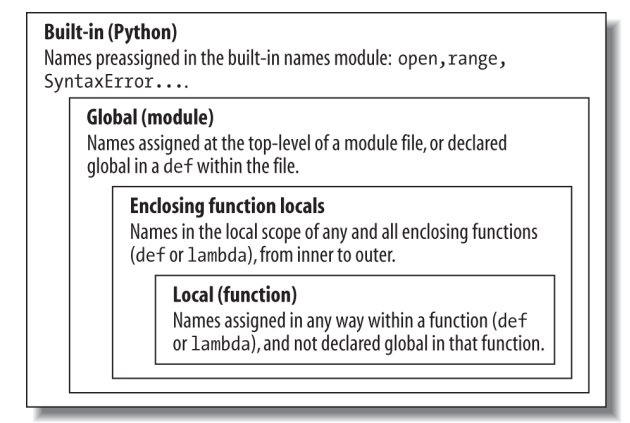

### 15.2.2 Name Resolution: The LEGB Rule
If the prior section sounds confusing, it really boils down to three simple rules. With a def statement:

1.   Name assignments create or change local names by default.
2.   Name references search at most four scopes: local, then enclosing functions (if any), then global, then built-in.
3.   Names declared in global and nonlocal statements map assigned names to enclosing module and function scopes, respectively. 

In other words, all names assigned inside a function def statement (or a lambda, an expression we’ll meet later) are locals by default. Functions can freely use names assigned in syntactically enclosing functions and the global scope, but they must declare
such nonlocals and globals in order to change them.

Python’s name-resolution scheme is sometimes called the LEGB rule, after the scope names:

1.   When you use an unqualified name inside a function, Python searches up to four scopes—the local (L) scope, then the local scopes of any enclosing (E) defs and lambdas, then the global (G) scope, and then the built-in (B) scope—and stops at the first place the name is found. If the name is not found during this search, Python reports an error.
2.  When you assign a name in a function (instead of just referring to it in an expression), Python always creates or changes the name in the local scope, unless it’s declared to be global or nonlocal in that function.
3.   When you assign a name outside any function (i.e., at the top level of a module file, or at the interactive prompt), the local scope is the same as the global scope -- the module’s namespace.

#### **!!! Redefining built-in names: For better or worse**

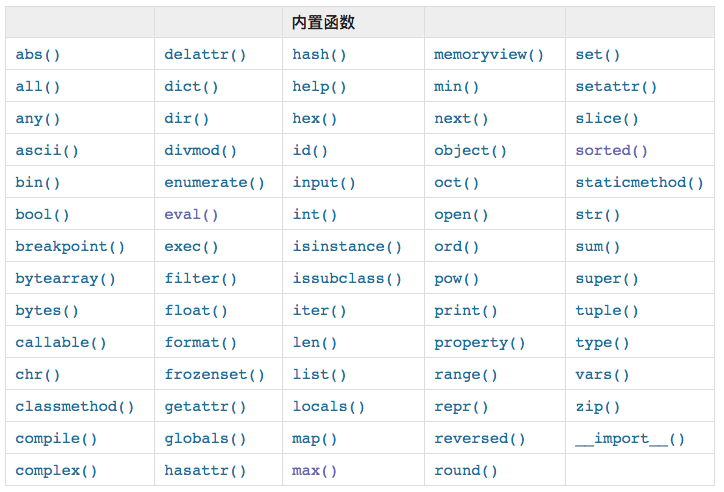



```
False      await      else       import     pass
None       break      except     in         raise
True       class      finally    is         return
and        continue   for        lambda     try
as         def        from       nonlocal   while
assert     del        global     not        with
async      elif       if         or         yield
```



### 15.2.3 Global

- Global names are variables assigned at the top level of the enclosing module file.
- Global names must be declared only if they are assigned within a function.
- Global names may be referenced within a function without being declared.

In [ ]:
x = 88

def f():
    global x
    x = 99

f()
print(x)

88


#### Program Design: Minimize Global Variables

In [ ]:
X = 99

def func1():
    global X
    X = 88

def func2():
    global X
    X = 77

What will the value of $X$ be here? Really, that question has no meaning unless it’s qualified with a point of
reference in time—the value of $X$ is timing-dependent, as it depends on which function was called last (something we can’t tell from this file alone).

Changing globals can lead to well-known software engineering problems: 


**because the variables’ values are dependent on the order of calls to arbitrarily distant functions, programs can become difficult to debug, or to understand at all.**







#### Program Design: Minimize Cross-File Changes



```
# first.py
X = 99 # This code doesn't know about second.py

# second.py
import first
print(first.X) # OK: references a name in another file
first.X = 88 # But changing it can be too subtle and implicit
```



After importing the first module, the second module prints its variable and then assigns
it a new value. Referencing the module’s variable to print it is fine—this is how modules
are linked together into a larger system normally. The problem with the assignment to
$first.X$, however, is that it is far too implicit: whoever’s charged with maintaining or
reusing the first module probably has no clue that some arbitrarily far-removed module
on the import chain can change X out from under him or her at runtime.

Although such cross-file variable changes are always possible in Python, they are usually
much more subtle than you will want. Again, this sets up too strong a coupling between
the two files—because they are both dependent on the value of the variable X, it’s
difficult to understand or reuse one file without the other. Such implicit cross-file dependencies can lead to inflexible code at best, and outright bugs at worst.

### *15.2.4 Factory Function and Nonlocal


**Factory functions** (a.k.a. closures) are sometimes used by programs that need to generate event handlers on the fly in response to conditions at runtime. For instance,
imagine a GUI that must define actions according to user inputs that cannot be anticipated when the GUI is built. In such cases, we need a function that creates and returns
another function, with information that may vary per function made.

In [ ]:
def maker(N):
    def action(X):     # Make and return action
        return X ** N  # action retains N from enclosing scope
    return action

This defines an outer function that simply generates and returns a nested function,
without calling it—maker makes action, but simply returns action without running it.
If we call the outer function:

In [ ]:
f = maker(2)

In [ ]:
f

<function __main__.maker.<locals>.action>

In [ ]:
f(3)

9

In [ ]:
f(4)

16

In [ ]:
g = maker(3)

In [ ]:
g(3)

27

In [ ]:
f(3)

9

The **nonlocal** statement is similar in both form and role to **global**, covered earlier. Like
**global**, **nonlocal** declares that a name will be changed in an enclosing scope. Unlike
**global**, though, **nonlocal** applies to a name in an enclosing function’s scope, not the
**global** module scope outside all defs. Also unlike **global**, **nonlocal** names must already
exist in the enclosing function’s scope when declared—they can exist only in enclosing
functions and cannot be created by a first assignment in a nested def.

In [ ]:
def tester(start):
    state = start # Each call gets its own state
    def nested(label):
        nonlocal state # Remembers state in enclosing scope
        print(label, state)
        state += 1 # Allowed to change it if nonlocal
    return nested

In [ ]:
 F = tester(0)

In [ ]:
F("apple")

apple 0


In [ ]:
F("orange")

orange 1


In [ ]:
F("grape")

grape 2


### *15.2.5 State  Retention Options

#### *State with nonlocal: 3.X only

In [ ]:
def tester(start):
    state = start # Each call gets its own state
    def nested(label):
        nonlocal state # Remembers state in enclosing scope
        print(label, state)
        state += 1 # Allowed to change it if nonlocal
    return nested

In [ ]:
F = tester(0)
F('spam')

spam 0


In [ ]:
F.state

In [ ]:
G = tester(100)
G('ham')

ham 100


In [ ]:
F('milk')

milk 1


#### State with Globals: A Single Copy Only

In [ ]:
def tester(start):
    global state # Move it out to the module to change it
    state = start # global allows changes in module scope
    def nested(label):
        global state
        print(label, state)
        state += 1
    return nested

In [ ]:
F = tester(0)
F('spam')

spam 0


In [ ]:
G = tester(100)
G('ham')

ham 100


In [ ]:
F('milk')

milk 101


#### *State with Classes: Explicit Attributes (Preview)

#### *State with Function Attributes: 3.X and 2.X

#### State with mutables: Obscure ghost of Pythons past?

In [ ]:
def tester(start):
    def nested(label):
        print(label, state[0]) # Leverage in-place mutable change
        state[0] += 1 # Extra syntax, deep magic?
    state = [start]
    return nested

In [ ]:
F = tester(0)
F('spam')

spam 0


In [ ]:
G = tester(100)
G('ham')

ham 100


In [ ]:
F('milk')

milk 1


## 15.3 Arguments


### 15.3.1 Pure function
A **pure function** does not produce side effects. It communicates with the calling program only through parameters (which it does not modify) and a return value. 

### 15.3.2 Argument-Passing Basics

Earlier in this part of the lesson, I noted that arguments are passed by assignment. This
has a few ramifications that aren’t always obvious to newcomers, which I’ll expand on
in this section. Here is a rundown of the key points in passing arguments to functions:
- Arguments are passed by automatically assigning objects to local variable
names. Function arguments—references to (possibly) shared objects sent by the
caller—are just another instance of Python assignment at work. Because references
are implemented as pointers, all arguments are, in effect, passed by pointer. Objects
passed as arguments are never automatically copied.
- Assigning to argument names inside a function does not affect the caller.
Argument names in the function header become new, local names when the function runs, in the scope of the function. There is no aliasing between function argument names and variable names in the scope of the caller.
- Changing a mutable object argument in a function may impact the caller.
On the other hand, as arguments are simply assigned to passed-in objects, functions can change passed-in mutable objects in place, and the results may affect the
caller. Mutable arguments can be input and output for functions.

### 15.3.3 Arguments and Shared References

<font size=4>***Immutable arguments are effectively passed "by value"***.<font>

Objects such as integers and strings are passed by object reference instead of by copying, but because you can’t change immutable objects in place anyhow, the effect is much like making a copy.

<font size=4>***Mutable arguments are effectively passed "by pointer".***<font>

Objects such as lists and dictionaries are also passed by object reference, mutable objects can be changed in place in the function.

In [ ]:
def f(a): # a is assigned to (references) the passed object
    a = 99 # Changes local variable a only

b = 88
f(b) # a and b both reference same 88 initially
print(b) # b is not changed

In [ ]:
def changer(a, b): # Arguments assigned references to objects
    a = 2 # Changes local name's value only
    b[0] = 'spam' # Changes shared object in place

X = 1
L = [1, 2] # Caller:

changer(X, L) # Pass immutable and mutable objects

X, L # X is unchanged, L is different

### 15.3.4 Avoiding Mutable Argument Changes

In [ ]:
def changer(a, b): # Arguments assigned references to objects
    a = 2 # Changes local name's value only
    b[0] = 'spam' # Changes shared object in place

X = 1
L = [1, 2] # Caller:

changer(X, L[:]) # Pass immutable and mutable objects

X, L # X is unchanged, L is different

### 15.3.5 Argument Matching Syntax

- Positionals: matched from left to right
The normal case, which we’ve mostly been using so far, is to match passed argument values to argument names in a function header by position, from left to right.
- Keywords: matched by argument name
Alternatively, callers can specify which argument in the function is to receive a value by using the argument’s name in the call, with the name=value syntax.
- Defaults: specify values for optional arguments that aren’t passed
Functions themselves can specify default values for arguments to receive if the call passes too few values, again using the name=value syntax.

In [ ]:
def f(a, b=2, c=3): print(a, b, c)

In [ ]:
f(1)

1 2 3


In [ ]:
f(a=1)

1 2 3


In [ ]:
f(1, 4)

1 4 3


In [ ]:
f(1, 4, 5)

1 4 5


In [ ]:
f(1, c=6)

1 2 6


## 15.4 Advanced Topics

### 15.4.1 Anonymous Functions: lambda

The lambda’s general form is the keyword lambda, followed by one or more arguments
(exactly like the arguments list you enclose in parentheses in a def header), followed
by an expression after a colon:

```
lambda argument1, argument2,... argumentN : expression using arguments
```

Function objects returned by running lambda expressions work exactly the same as
those created and assigned by defs, but there are a few differences that make lambdas
useful in specialized roles:
- lambda is an expression, not a statement.
- lambda’s body is a single expression, not a block of statements.

lambda is designed for coding simple functions, and def handles larger tasks.

In [ ]:
def func(x, y, z): return x + y + z

In [ ]:
func(1, 2, 3)

6

In [ ]:
f = lambda x, y, z: x + y + z

In [ ]:
f(1, 2, 3)

6

Generally speaking, lambda comes in handy as a sort of function shorthand that allows
you to embed a function’s definition within the code that uses it. They are entirely
optional—you can always use def instead, and should if your function requires the
power of full statements that the lambda’s expression cannot easily provide—but they
tend to be simpler coding constructs in scenarios where you just need to embed small
bits of executable code inline at the place it is to be used.

lambda is also commonly used to code jump tables, which are lists or dictionaries of actions to be performed on demand. 

In [ ]:
L = [lambda x: x ** 2, # Inline function definition
     lambda x: x ** 3,
     lambda x: x ** 4] # A list of three callable functions

In [ ]:
for f in L:
    print(f(2))

4
8
16


In [ ]:
print(L[0](3))

9


### 15.4.2 Mapping Functions over Iterables: map

One of the more common things programs do with lists and other sequences is apply
an operation to each item and collect the results—selecting columns in database tables,
incrementing pay fields of employees in a company, parsing email attachments, and so
on. Python has multiple tools that make such collection-wide operations easy to code.
For instance, updating all the counters in a list can be done easily with a for loop:

In [1]:
counters = [1, 2, 3, 4]

updated = []

for x in counters:
    updated.append(x + 10) # Add 10 to each item

updated

[11, 12, 13, 14]

But because this is such a common operation, Python also provides built-ins that do
most of the work for you. The map function applies a passed-in function to each item
in an iterable object and returns a list containing all the function call results. For example:

In [3]:
# def inc(x): return x + 10

list(map((lambda x : x + 10), counters))

[11, 12, 13, 14]

### 15.4.3 Selecting Items in Iterables: filter

The **map** function is a primary and relatively straightforward representative of Python’s
functional programming toolset. Its close relatives, **filter** and **reduce**, select an iterable’s items based on a test function and apply functions to item pairs, respectively.

In [4]:
list(range(-5, 5))  # An iterable in 3.X

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [16]:
list(map((lambda x: x + 1), range(-5, 5))) # An iterable in 3.X

[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [17]:
list(filter((lambda x: x + 1), range(-5, 5))) # An iterable in 3.X

[-5, -4, -3, -2, 0, 1, 2, 3, 4]

### 15.4.4 Combining Items in Iterables: reduce

In [14]:
from functools import reduce # Import in 3.X, not in 2.X

reduce((lambda x, y: x + y), [1, 2, 3, 4])

10

In [15]:
reduce((lambda x, y: x * y), [1, 2, 3, 4])

24

### List Comprehensions Versus map

In [ ]:
res = []

for x in 'spam':
    res.append(ord(x)) # Manual results collection

res

[115, 112, 97, 109]

In [ ]:
res = list(map(ord, 'spam'))

res

[115, 112, 97, 109]

In [ ]:
res = [ord(x) for x in 'spam']

res

[115, 112, 97, 109]

The effect of the preceding example is similar to that of the manual for loop and the
map call. List comprehensions become more convenient, though, when we wish to apply
an arbitrary expression to an iterable instead of a function:

In [ ]:
[x ** 2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
list(map((lambda x: x ** 2), range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### List Comprehensions and Matrixes

#### Reference, Shallow copy and Deep copy

In [ ]:
L1 = [1, 2]
L2 = L1
L3 = L1[:]
L4 = L1.copy()

In [ ]:
L2 is L1 

True

In [ ]:
L3 is L1

False

In [ ]:
L4 is L1

False

#### Initial a list or matrix

In [ ]:
line = [0] * 10
matrix1 = [line for i in range(10)]

In [ ]:
matrix2 = [line[:] for i in range(10)]

In [ ]:
line[0] = 1

In [ ]:
matrix1

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
matrix2

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

#### why deepcopy?

In [ ]:
L1 = [1, [2, 3]]

In [ ]:
L2 = L1.copy()

In [ ]:
L2[1] is L1[1]

True

In [ ]:
from copy import deepcopy
L3 = deepcopy(L1)

In [ ]:
L3[1] is L1[1]

False

#### matrix operation

In [ ]:
M = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

N = [[2, 2, 2],
     [3, 3, 3],
     [4, 4, 4]]

In [ ]:
[row[1] for row in M]

[2, 5, 8]

In [ ]:
[M[i][i] for i in range(len(M))]

[1, 5, 9]

In [ ]:
[M[i][len(M)-1-i] for i in range(len(M))]

[3, 5, 7]